In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
mail=pd.read_csv('messages.csv')
mail.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [6]:
print('shape=>',mail.shape)

shape=> (2893, 3)


In [7]:
print('mails','\n',mail.label.value_counts())

mails 
 0    2412
1     481
Name: label, dtype: int64


In [8]:
# new column for length of message
mail['length']=mail.message.str.len()
mail.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [9]:
# convert all messages to lower case

mail['message']=mail['message'].str.lower()
mail.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [10]:
# replace email address with 'email'

mail['message']=mail['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [11]:
# Replace URLs with 'webaddresses'

mail['message']=mail['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

In [12]:
# Replace money symbols with 'moneysymbole'

mail['message']=mail['message'].str.replace(r'£|\$','dollers')

In [13]:
# Replace 10 digit phone numbers(formats include parenthesis, spaces, no space, dashes with 'phonenumber')
mail['message']=mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\S-]?[\d]{4}$','phonenumber')

In [14]:
# Replace numbers with 'number'
mail['message']=mail['message'].str.replace(r'\d+(\.\d+)?','number')

In [15]:
# Remove punctuation

mail['message']=mail['message'].str.replace(r'[^\w\d\s]','')

In [16]:
# Replacing whitespace between terms with a single space

#mail['message']= mail['message'].str.replace(r'\s+','')

In [17]:
# Remove leadin and trailing whitespace

mail['message']=mail['message'].str.replace(r'^\S+||s+?','')

In [18]:
mail.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,length number applei reearch center a u dol...,0,2856
1,NaN,claification grime joeph e and barbara f g...,0,1800
2,query : letter frequencies for text identifica...,am poting thi inquiry for ergei atama atama ...,0,1435
3,risk,colleague and i are reearching the differing ...,0,324
4,request book information,thi morning i wa on the phone with a friend o...,0,1046
5,call for abstracts : optimality in syntactic t...,length number call for paper i the bet good...,0,4492
6,m . a . in scandinavian linguistics,a in candinavian linguitic at the univerity...,0,2201
7,call for papers : linguistics session of the m...,for paper linguitic eion midwet modern lang...,0,802
8,foreign language in commercials,length number greeting i m wondering if o...,0,1230
9,fulbright announcement : please post / dissemi...,announcement pleae pot dieminate to lit ubj...,0,1478


In [19]:
# Remove stopwords

import string
import nltk
from nltk.corpus import stopwords

stop_words= set(stopwords.words('english')+['u','U','ur','4','2','im','dont','doin','ure'])

mail['message']=mail['message'].apply(lambda x:''.join(term for term in x.split() if term not in stop_words))

In [20]:
# New column (clean_length after punctuations, stopwords removal)

mail['clean_length']=mail.message.str.len()
mail.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,lengthnumberappleireearchcenterdollernumbermil...,0,2856,1743
1,NaN,claificationgrimejoephebarbarafgrimeethnologue...,0,1800,1192
2,query : letter frequencies for text identifica...,potingthiinquiryergeiatamaatamaumabnetabumdedu...,0,1435,888
3,risk,colleaguereearchingdifferingdegreerikperceived...,0,324,172
4,request book information,thimorningwaphonefriendminelivingouthamericata...,0,1046,507


In [21]:
# Total length removal

print('original lenth', mail.length.sum())
print('clean length', mail.clean_length.sum())

original lenth 9344743
clean length 5549171


In [22]:
mail.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,lengthnumberappleireearchcenterdollernumbermil...,0,2856,1743
1,NaN,claificationgrimejoephebarbarafgrimeethnologue...,0,1800,1192
2,query : letter frequencies for text identifica...,potingthiinquiryergeiatamaatamaumabnetabumdedu...,0,1435,888
3,risk,colleaguereearchingdifferingdegreerikperceived...,0,324,172
4,request book information,thimorningwaphonefriendminelivingouthamericata...,0,1046,507


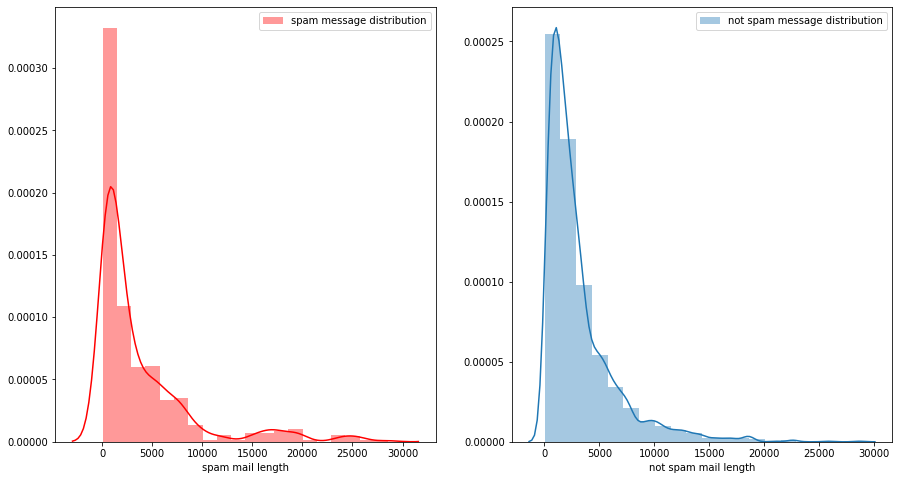

In [23]:
# Message distribution BEFORE cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(mail[mail['label']==1]['length'],bins=20,
            ax=ax[0],label='spam message distribution',color='r')
ax[0].set_xlabel('spam mail length')
ax[0].legend()


sns.distplot(mail[mail['label']==0]['length'],bins=20,ax=ax[1],label='not spam message distribution')
ax[1].set_xlabel('not spam mail length')
ax[1].legend()

plt.show()

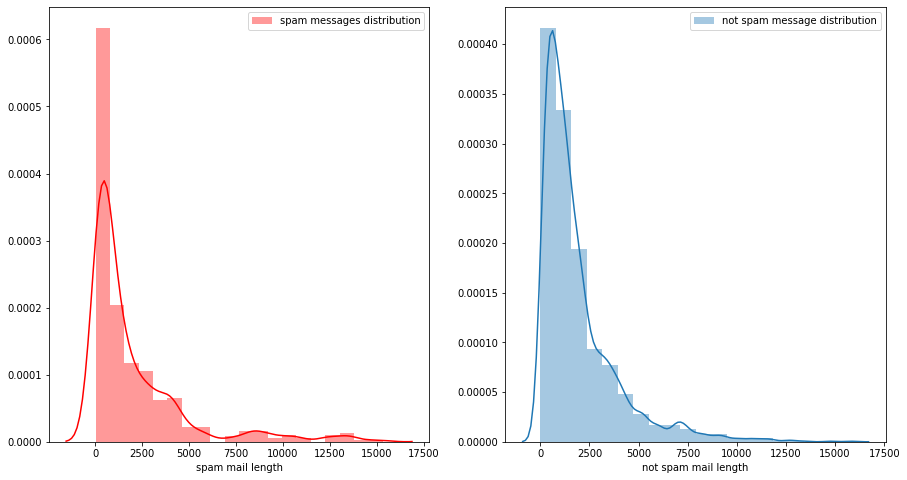

In [24]:
# Message distribution AFTER cleaning
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(mail[mail['label']==1]['clean_length'],bins=20,
            ax=ax[0],label='spam messages distribution',color='r')
ax[0].set_xlabel('spam mail length')
ax[0].legend()


sns.distplot(mail[mail['label']==0]['clean_length'],bins=20,ax=ax[1],label='not spam message distribution')
ax[1].set_xlabel('not spam mail length')
ax[1].legend()

plt.show()

In [39]:
!pip install wordcloud

In [ ]:
# getting sense of loud words in spam

from wordcloud import WordCloud
spams=mail['message'][mail['label']==1]
spam_cloud=WordCloud(width=700,height=500,
           background_color='white',max_words=50).generate(''.join(spams))


plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# getting sense of loud words in not spam mails

not_spam=mail['message'][mail['label']==0]
spam_cloud=WordCloud(width=600, height=400, background_color='white',max_words=50).generate(''.join(not_spam))



plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(mail['message'])
x=features
y=mail['label']


In [36]:
# Train and predict
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)

print('Final score=>', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Final score=> 0.8121546961325967
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       585
           1       1.00      0.02      0.04       139

    accuracy                           0.81       724
   macro avg       0.91      0.51      0.47       724
weighted avg       0.85      0.81      0.73       724



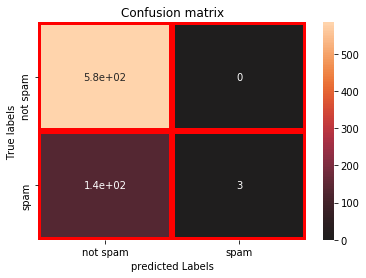

In [41]:
# Plot confusion matrix heatmap

conf_mat=confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax, linewidth=5, linecolor='r', center=0)

ax.set_xlabel('predicted Labels');ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [38]:
conf_mat

array([[585,   0],
       [136,   3]], dtype=int64)